In [315]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [316]:
df = pd.read_csv("~/Downloads/penguins_Lter.csv")
df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [317]:
newdf = df.drop(columns= {'Comments','Region', 'Individual ID'})
newdf

,studyName,Sample Number,Species,Island,Stage,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,"Adult, 1 Egg Stage",Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,"Adult, 1 Egg Stage",Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Biscoe,"Adult, 1 Egg Stage",No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Biscoe,"Adult, 1 Egg Stage",Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Biscoe,"Adult, 1 Egg Stage",Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Biscoe,"Adult, 1 Egg Stage",Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


In [318]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Island               344 non-null    object 
 4   Stage                344 non-null    object 
 5   Clutch Completion    344 non-null    object 
 6   Date Egg             344 non-null    object 
 7   Culmen Length (mm)   342 non-null    float64
 8   Culmen Depth (mm)    342 non-null    float64
 9   Flipper Length (mm)  342 non-null    float64
 10  Body Mass (g)        342 non-null    float64
 11  Sex                  334 non-null    object 
 12  Delta 15 N (o/oo)    330 non-null    float64
 13  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 37.8+ KB


In [319]:
converting = OrdinalEncoder()
newdf[['studyname', 'island', 'stage', 'cluth completion', 'sex']] = converting.fit_transform(newdf[['studyName', 'Island', 'Stage', 'Clutch Completion', 'Sex']])
newdf

,studyName,Sample Number,Species,Island,Stage,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),studyname,island,stage,cluth completion,sex
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,"Adult, 1 Egg Stage",Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,0.0,2.0,0.0,1.0,2.0
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,"Adult, 1 Egg Stage",Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,0.0,2.0,0.0,1.0,1.0
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,0.0,2.0,0.0,1.0,1.0
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,1.0,NaN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,0.0,2.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Biscoe,"Adult, 1 Egg Stage",No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Biscoe,"Adult, 1 Egg Stage",Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,2.0,0.0,0.0,1.0,1.0
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Biscoe,"Adult, 1 Egg Stage",Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,2.0,0.0,0.0,1.0,2.0
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Biscoe,"Adult, 1 Egg Stage",Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,2.0,0.0,0.0,1.0,1.0


In [320]:
new = newdf.drop(columns= {'studyName','Island', 'Stage', 'Clutch Completion', 'Sex', 'Date Egg', 'Sample Number', 'stage'})
new 

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),studyname,island,cluth completion,sex
0,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181.0,3750.0,NaN,NaN,0.0,2.0,1.0,2.0
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0,8.94956,-24.69454,0.0,2.0,1.0,1.0
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0,8.36821,-25.33302,0.0,2.0,1.0,1.0
3,Adelie Penguin (Pygoscelis adeliae),NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0,8.76651,-25.32426,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,NaN
340,Gentoo penguin (Pygoscelis papua),46.8,14.3,215.0,4850.0,8.41151,-26.13832,2.0,0.0,1.0,1.0
341,Gentoo penguin (Pygoscelis papua),50.4,15.7,222.0,5750.0,8.30166,-26.04117,2.0,0.0,1.0,2.0
342,Gentoo penguin (Pygoscelis papua),45.2,14.8,212.0,5200.0,8.24246,-26.11969,2.0,0.0,1.0,1.0


In [321]:
new_data = new.fillna(value= new.median())
new_data

/var/folders/xd/cd82lqkd7_n0_1z1_7dx7qs40000gn/T/ipykernel_24382/2889887952.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_data = new.fillna(value= new.median())


,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),studyname,island,cluth completion,sex
0,Adelie Penguin (Pygoscelis adeliae),39.10,18.7,181.0,3750.0,8.652405,-25.83352,0.0,2.0,1.0,2.0
1,Adelie Penguin (Pygoscelis adeliae),39.50,17.4,186.0,3800.0,8.949560,-24.69454,0.0,2.0,1.0,1.0
2,Adelie Penguin (Pygoscelis adeliae),40.30,18.0,195.0,3250.0,8.368210,-25.33302,0.0,2.0,1.0,1.0
3,Adelie Penguin (Pygoscelis adeliae),44.45,17.3,197.0,4050.0,8.652405,-25.83352,0.0,2.0,1.0,2.0
4,Adelie Penguin (Pygoscelis adeliae),36.70,19.3,193.0,3450.0,8.766510,-25.32426,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),44.45,17.3,197.0,4050.0,8.652405,-25.83352,2.0,0.0,0.0,2.0
340,Gentoo penguin (Pygoscelis papua),46.80,14.3,215.0,4850.0,8.411510,-26.13832,2.0,0.0,1.0,1.0
341,Gentoo penguin (Pygoscelis papua),50.40,15.7,222.0,5750.0,8.301660,-26.04117,2.0,0.0,1.0,2.0
342,Gentoo penguin (Pygoscelis papua),45.20,14.8,212.0,5200.0,8.242460,-26.11969,2.0,0.0,1.0,1.0


In [322]:
new_data.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),studyname,island,cluth completion,sex
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,43.925000,17.152035,200.892442,4200.872093,8.730086,-25.691855,1.029070,0.662791,0.895349,1.514535
std,5.443792,1.969060,14.023826,799.696532,0.540630,0.779277,0.818356,0.726194,0.306549,0.506308
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540,0.000000,0.000000,0.000000,0.000000
25%,39.275000,15.600000,190.000000,3550.000000,8.307415,-26.285460,0.000000,0.000000,1.000000,1.000000
50%,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520,1.000000,1.000000,1.000000,2.000000
75%,48.500000,18.700000,213.000000,4750.000000,9.136170,-25.089467,2.000000,1.000000,1.000000,2.000000
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670,2.000000,2.000000,1.000000,2.000000


In [ ]:
#Analysis
#Showing the Relationship between Species and Body Mass. 
#From the Barplot, Gentoo Penguin Species has the highest number of Body mass as compared to Adelie and Chinstrap (Penguins)

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Species'>

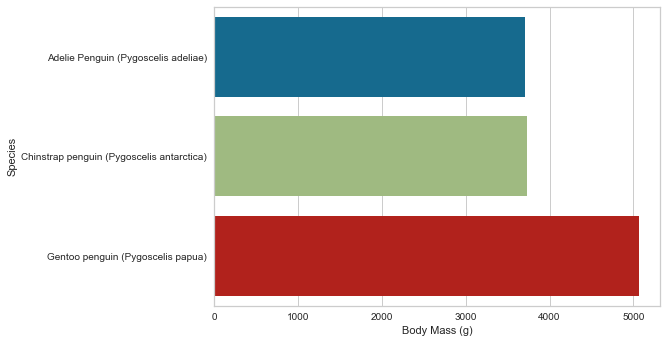

In [325]:
sns.barplot(y="Species", x="Body Mass (g)", ci = None, data=new_data)

In [ ]:
#Showing the Relationship between Species and Delta 15 N (0/00). 
#From the Barplot, Chinstarp Penguin Species has the highest value of Delta 15 N (0/00) as compared to Adelie and Gentoo (Penguins)

<AxesSubplot:xlabel='Delta 15 N (o/oo)', ylabel='Species'>

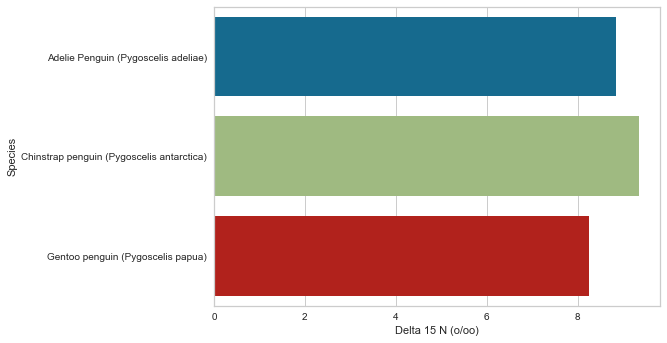

In [326]:
sns.barplot(y="Species", x="Delta 15 N (o/oo)", ci = None, data=new_data)

In [ ]:
#Showing the Relationship between Species and Delta 13 C (0/00). 
#From the Barplot, Gentoo Penguin Species has the lowest value of Delta 13 C (0/00) mass as compared to Adelie and Chinstrap (Penguins)

<AxesSubplot:xlabel='Delta 13 C (o/oo)', ylabel='Species'>

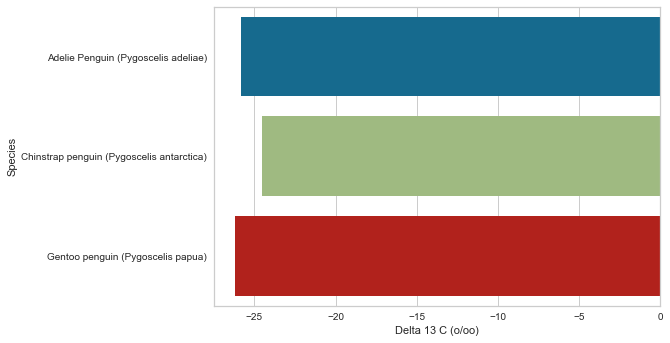

In [327]:
sns.barplot(y="Species", x="Delta 13 C (o/oo)", ci = None, data=new_data)

In [ ]:
#Showing the Relationship between Species and Island. 
#From the Barplot, Gentoo Penguin Species cannot be found in any of the islands given in the Data Set

<AxesSubplot:xlabel='island', ylabel='Species'>

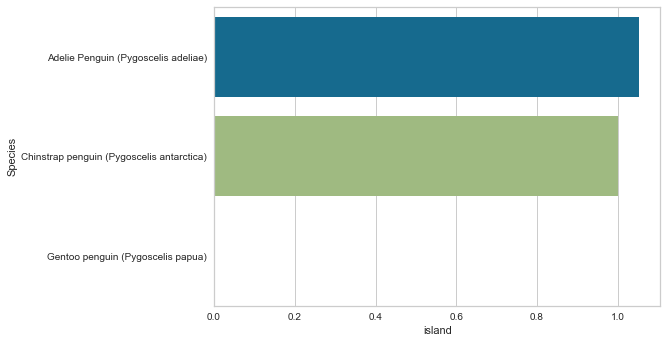

In [328]:
sns.barplot(y="Species", x="island", ci = None, data=new_data)

<AxesSubplot:>

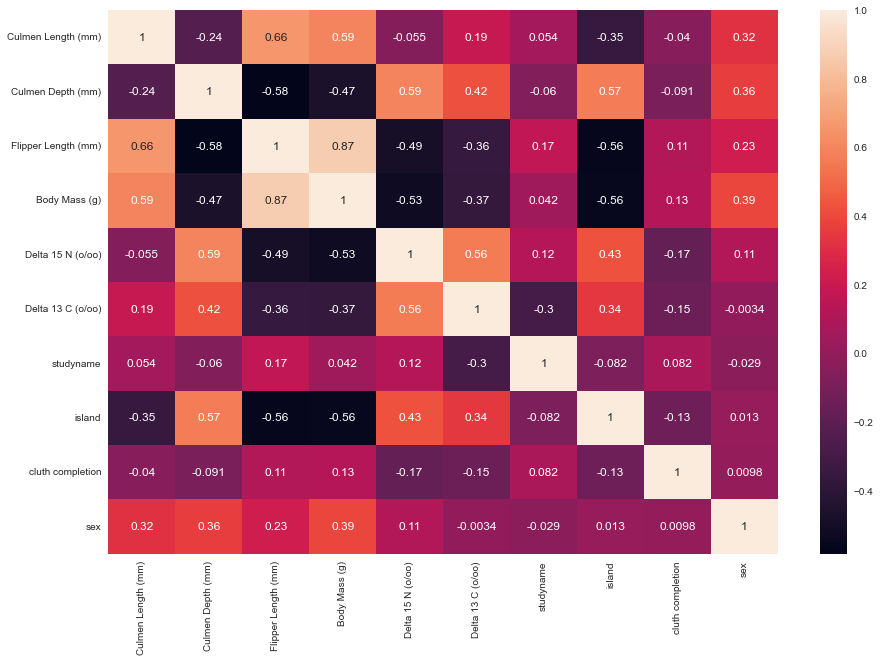

In [329]:
plt.figure(figsize=(15, 10))
sns.heatmap(new_data.corr(), annot=True)

In [330]:
y = new_data["Species"]
X = new_data.drop(columns=['Species'], axis=1)

In [331]:
def calcu_mult(new_data):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return vif

In [332]:
calcu_mult(new_data)

,variables,VIF
0,Culmen Length (mm),190.273965
1,Culmen Depth (mm),213.269579
2,Flipper Length (mm),1284.672518
3,Body Mass (g),180.397084
4,Delta 15 N (o/oo),449.276469
5,Delta 13 C (o/oo),800.349639
6,studyname,2.750818
7,island,3.289249
8,cluth completion,10.047364
9,sex,20.354001


In [333]:
sample = SMOTE(random_state = 45)
X, y = sample.fit_resample(X, y)
y.value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Chinstrap penguin (Pygoscelis antarctica)    152
Gentoo penguin (Pygoscelis papua)            152
Name: Species, dtype: int64

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state = 45, test_size = 0.20, train_size = 0.80)

In [335]:
std_scale = MinMaxScaler()
X_train_norm = pd.DataFrame(std_scale.fit_transform(X_train))

In [336]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train_norm, y_train, random_state = 45, test_size=0.20, train_size = 0.80)

In [337]:
pca = PCA(n_components= 10)
model = pca.fit(X_train_)
PCA(n_components= 10)
print(model.explained_variance_ratio_)  

[0.35404798 0.21404089 0.15066698 0.10451064 0.07912597 0.04858747
 0.01912038 0.01434331 0.00943019 0.00612619]


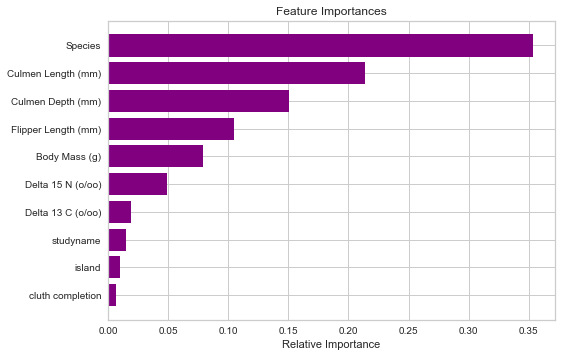

In [338]:
features = new_data.columns
importances = model.explained_variance_ratio_
indices = np.argsort(importances)[-10:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Text(0.5, 1.0, 'Elbow curve')

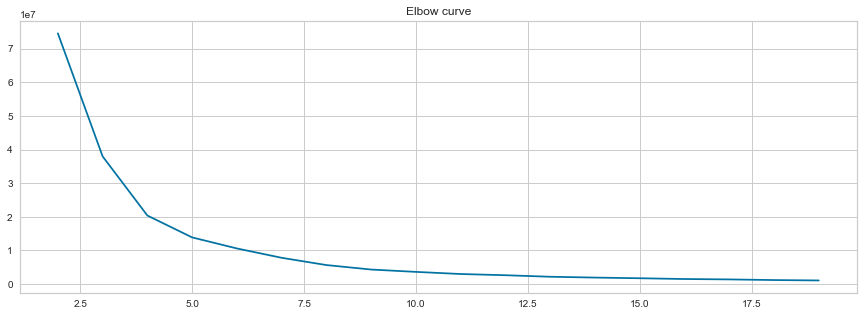

In [339]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

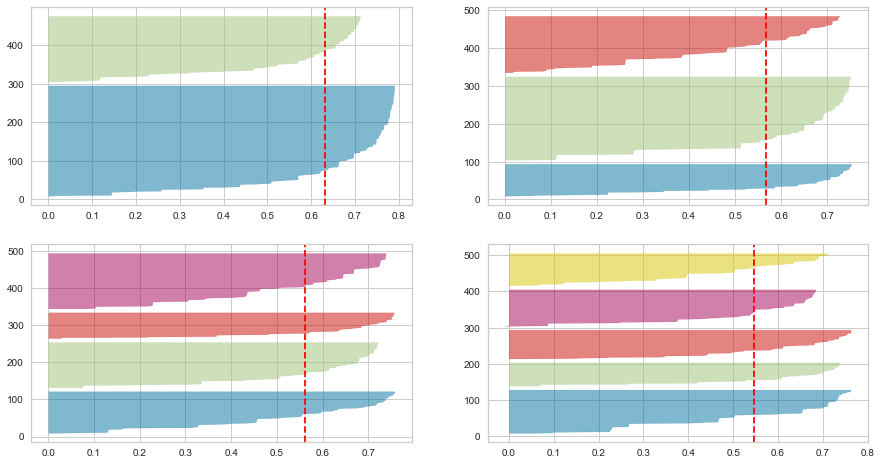

In [340]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [341]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [342]:
model = KNeighborsClassifier(n_neighbors = 5)
ny = model.fit (X_train_, y_train_)

In [350]:
mod = ny.score(X_train_, y_train_)
mod

0.9862542955326461

In [367]:
y_predict = ny.predict(X_test_)

In [360]:
confusion_matrix(y_test_, y_predict)

array([[26,  1,  0],
       [ 0, 26,  0],
       [ 0,  0, 20]])

In [362]:
print(classification_report(y_test_, y_predict))

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      0.96      0.98        27
Chinstrap penguin (Pygoscelis antarctica)       0.96      1.00      0.98        26
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        20

                                 accuracy                           0.99        73
                                macro avg       0.99      0.99      0.99        73
                             weighted avg       0.99      0.99      0.99        73



In [ ]:
#SUMMARY

#The Trained Model has a precision accuracy of 98%  in classifying the Adelie Penguin and Chinstrap Penguin
#With a score of 100% for the Gentoo Penguin.

#This Model can be used to Classify Penguins based on the Independent variables in this Dataset.

#This Model can be converted into an API to be consumed by the frontend.
 


